# Modules and Variables

In [38]:
import matplotlib.pyplot as plt
import mplcyberpunk
from moviepy.editor import *
import numpy as np 
import os
import shutil

fps=30 #frames per second
duration=8 #in seconds
resolution="full_HD"
file_name="neon-erro"
#convertion to dpi
resolutiontodpi={"preview":50,"HD":150,"full_HD":300,"4k":600}
try: os.mkdir("tempfiles")
except:pass

# Graph 

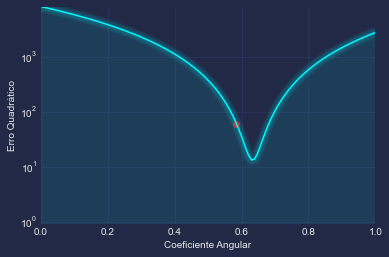

In [45]:
time=np.linspace(0,2,fps*duration)
j=0
y=[26.1,30.1,37.3,44.5,50.6,59.6,62.7,68.1]
x=[10,20,30,40,50,60,70,80]
Erroro=[]
dic={}
k=0
for t in time:
    if t<=1:
        Erroro.append(error(x,y,t))
    dic[t]=k
    k+=1
for t in time:
    plt.clf()
    ##Math
    plt.yscale("log")
    plt.ylim(0,8_000)
    if t<0.63:
        z=np.linspace(0,t,dic[t])
        plt.plot(z,Erroro[0:dic[t]])
        plt.scatter(t,error(x,y,t),color="red")
    if t>=0.63:
        if t<1:
            z=np.linspace(0,t,dic[t])
            plt.plot(z,Erroro[0:dic[t]])
        if t>=1:
            z=np.linspace(0,1,len(Erroro))
            plt.plot(z,Erroro)
        t2=0.63*(1+0.1*np.sin((t-0.63)*50/3))
        plt.scatter(t2,error(x,y,t2),color="red")
    ##Style
    plt.style.use("cyberpunk")
    plt.xlim(0,1)
    plt.xlabel("Coeficiente Angular")
    plt.ylabel("Erro Quadrático")
    #plt.legend() #active this line when there's labels
    ##Code
    mplcyberpunk.add_glow_effects()
    plt.savefig("tempfiles"+"\\"+file_name+str(j)+".jpg",dpi=300)
    j+=1
pictures=[]
j=0


# Video coding

In [46]:
for _ in range(len(time)):
    pictures.append(ImageClip("tempfiles"+"\\"+file_name+str(j)+'.jpg').set_duration(1/fps))
    j+=1
shutil.rmtree('tempfiles')
video = concatenate(pictures, method="compose")
video.write_videofile(file_name+'.mp4', fps=30, codec='h264')


Moviepy - Building video neon-erro.mp4.
Moviepy - Writing video neon-erro.mp4



Moviepy - Done !
Moviepy - video ready neon-erro.mp4


# Do whatever you want here

In [39]:
y=[26.1,30.1,37.3,44.5,50.6,59.6,62.7,68.1]
x=[10,20,30,40,50,60,70,80]
np.polyfit(x,y,1)
def error(x,y,a):
    erro=0
    for j in range(len(x)):
        erro+=(a*x[j]+19-y[j])**2
    return erro
error(x,y,0)

8126.18